# Pandas
Pandas is a programming library that is especially good for analyzing data (Statistical, Machine Learning). Above all, data frames are used, which can be treated like tables with an index column and a headline row.

In [ ]:
import pandas as pd # to use a command from pandas - have to write pd. before the comment
import numpy as np

---
# RECAP: Online Data Camp Course

We assume you attended the required online Data Camp course:

**"Data Manipulation with Pandas"** </br>
Free Chapter 1 "Transforming Data" https://learn.datacamp.com/courses/data-manipulation-with-pandas

That means we assume you are familiar with: 

| Method / Function        | Description                                                                                        |
|:---------------|:------------------------------                                                                               |
|**General attributes of a dataframe** |                                                                                        |
| `.shape`         | hom many rows and columns                                                                                    |
| `.columns`         | get the names of all columns                                                                               |
| `.index`      | get the indices                                                                                              |
| `.values`        | get all values                                                                                              |
||                                                                                                                              |
|**Summary methods**                |                                                                                           |
| `.head()`                           | show the first rows of a DF                                                               |
| `.tail()`                           | show the last rows of a DF                                                                |
| `.info()`                           | receive information on the DF (all columns, datatypes, memory...)                         |
| `.describe()`                       | get statistical properties on your data                                                   |
| `.print()`                           | write the data as an output                                                               |
| `.sort_values(acending=True/False)` | sort the values, ascending or descending                                                  |
|                                   |                                                                                           |
|**Subsetting (combinations possible)**|                                                                                        |
| `df["name_of_colum"] > 50` | subsetting (multiple) columns or rows on  floats                                                   |
|`df[ df["name_of_colum"] == "new" ]`|subsetting on strings                                                                       |
|`df[ df["date"] > "2015-01-01" ]`|subsetting on dates                                                                            |
| `.isin()`| subsetting using isin()                                                                                              |
||                                                                                                                              |
|**Creating new columns**|                                                                                                      |
|`df["new"] = df["old"] / 10` |adding a new colum                                                                                 |
|||

---
# Import a file and save changes

To read in Excel files, use the command: `pd.read_excel('Name_of_excel_file.xlsx')`

To read in csv files, used the command: `pd.read_csv('Name_of_csv_file.csv')`

In [ ]:
df = pd.read_excel('example.xlsx',index_col=0)

In [ ]:
df.head()
df[:5]

df.tail()
df[-5:]

df.info()

To save the changes, the data frame is stored in a new variable.

In [ ]:
df_new = df[ df['ESV']==0 ] ['ESV'][:3]
df_new

In [ ]:
print('Is df_new equal to df?')
df_new.equals(df) # check if df_new exactly matches df

# Handling NaNs
As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. **NaN** is the default missing value marker for reasons of computational speed and convenience.

In many cases it makes sense to remove rows or columns where a lot of NaNs are located so that the dataframe is more structured.

In [ ]:
df['Empty'] = np.nan 
df.head()

Removing a column in general is done with the `.drop()` method:

In [ ]:
df.drop(columns='Empty', inplace=True)
df.head()

**.dropna()** is a method specialized to remove rows or columns with NaNs.

   The parameter `how` determines if row or column is removed from DataFrame, when we have
    at least one NaN or all NaNs.

   * 'any' : If any NA values are present, drop that row or column.
   * 'all' : If all values are NA, drop that row or column.
   
   `axis` determines on which axis (x or y) NaNs should be searched for.

**default settings**: .dropna() deletes **rows** which contain **any** NaN  

In [ ]:
df.dropna(axis=1, how="all")

With `pd.isna` a boolean dataframe can be created that indicates where NaNs (Not a Number) are. `pd.notna` does the opposite.

In [ ]:
pd.isna(df['PRESSURE'][0:3])

In [ ]:
pd.notna(df['PRESSURE'][0:3])

### Exercise

In [ ]:
### Dont change this ###
df_explore = pd.read_csv('explore.csv', index_col=0)

1. Remove the columns with a lot of NaN's:

In [ ]:
# place for your solution

2. Show the first 5 rows of your new dataframe

In [ ]:
# place for your solution

---
# Resample and Fill

In our example, only every second second was recorded.

In [ ]:
df.head()

To modify the data so that every second is recorded, the dataframe can be resampled. 

Use .ffill() to fill the newly created rows in forward direction (the value of the row above is used). By .bfill() you can fill in backward direction.

In [ ]:
df=df.resample('1S').ffill()
df.head()

In [ ]:
df.info()

There are still many NaNs (Not a Number) in the dataframe. If you want to replace these, you can use .fillna(). It can be refilled forwards with ffill and backwards with bfill.

In [ ]:
df=df.fillna(method='ffill')
df.info()

The number of NaNs is dropped in column "Pressure" and "ESV". It can be seen that there are no NaNs left in the third row. 

In [ ]:
df.head()

### Excercise

Use the explore df and eleminate the NaNs in Inuse N-Petane and Inuse Hexane.

In [ ]:
df_explore = pd.read_csv('explore.csv', index_col=0)

In [ ]:
# place for your solution

---
# "Vectorized" calculations in Python

As shown in "Transforming Data" (https://learn.datacamp.com/courses/data-manipulation-with-pandas) it's easy to do do calculations and add colums in Pandas.

Let's create a column RPM:

In [ ]:
df['RPM']=df['TURBINE SPEED']*60
df.head(3)

Now we will show slow and fast ways of calculations in Pandas:

In [ ]:
import time # to measure time

In [ ]:
df_explore = pd.read_csv('explore.csv', index_col=0)

In [ ]:
df_explore.head(3)

<div>
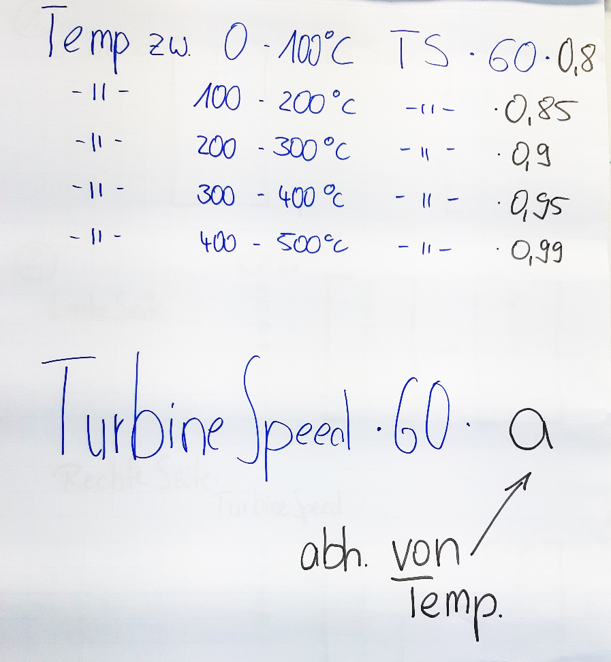
</div>

Example with loop

In [ ]:
def RPM_loop(df):
    # Reset th column RPM
    df['RPM'] = np.nan
    for i in range(len(df)):
        if 0 <= df.loc[i, 'TEMP COMPR OUTLET'] < 100:
            df.loc[i, 'RPM'] = df.loc[i, 'TURBINE SPEED']*60*0.80
        if 100 <= df.loc[i, 'TEMP COMPR OUTLET'] < 200:
            df.loc[i, 'RPM'] = df.loc[i, 'TURBINE SPEED']*60*0.85
        if 200 <= df.loc[i, 'TEMP COMPR OUTLET'] < 300:
            df.loc[i, 'RPM'] = df.loc[i, 'TURBINE SPEED']*60*0.90
        if 300 <= df.loc[i, 'TEMP COMPR OUTLET'] < 400:
            df.loc[i, 'RPM'] = df.loc[i, 'TURBINE SPEED']*60*0.95
        if 400 <= df.loc[i, 'TEMP COMPR OUTLET'] < 500:
            df.loc[i, 'RPM'] = df.loc[i, 'TURBINE SPEED']*60*0.99

In [ ]:
start=time.time()
RPM_loop(df_explore)
time.time()-start

In [ ]:
df_explore['RPM'].head()

Example with vectorized calculation

<div>
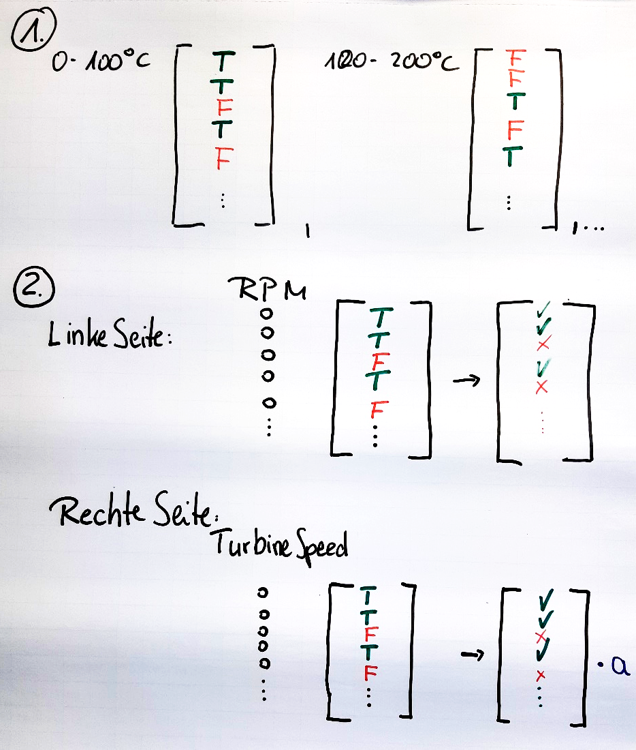
</div>

In [ ]:
def RPM_vectorized(df):
    # Reset the column RPM
    df['RPM'] = np.nan
    # Round the values in TEMP COMPR OUTLET
    df['TEMP COMPR OUTLET'] = df['TEMP COMPR OUTLET'].round()
    
    # Define boolean temperature range arrays
    v_low_temp = df['TEMP COMPR OUTLET'].isin(range(0, 100))
    low_temp = df['TEMP COMPR OUTLET'].isin(range(100, 200))
    medium_temp = df['TEMP COMPR OUTLET'].isin(range(200, 300))
    high_temp = df['TEMP COMPR OUTLET'].isin(range(300, 400))
    v_high_temp = df['TEMP COMPR OUTLET'].isin(range(400, 500))
    
    # Apply TURBINE SPEED to temperature ranges
    df.loc[v_low_temp, 'RPM'] = df.loc[v_low_temp, 'TURBINE SPEED']*60*0.80
    df.loc[low_temp, 'RPM'] = df.loc[low_temp, 'TURBINE SPEED']*60*0.85
    df.loc[medium_temp, 'RPM'] = df.loc[medium_temp, 'TURBINE SPEED']*60*0.90
    df.loc[high_temp, 'RPM'] = df.loc[high_temp, 'TURBINE SPEED']*60*0.95
    df.loc[v_high_temp, 'RPM'] = df.loc[v_high_temp, 'TURBINE SPEED']*60*0.99

In [ ]:
start=time.time()
RPM_vectorized(df_explore)
time.time()-start

In [ ]:
df_explore['RPM'].head()

---
# Datetime

* usefull to analyze large datasets

In [ ]:
df_explore.dtypes

Change the data type in timestamp from object to datetime.

In [ ]:
df_explore['timestamp'] = pd.to_datetime(df_explore['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_explore.dtypes

---
# Pickle Format

* the pickle format is native to Python </br>
  -> not recommended for the use across different programming languages

* provides persistency in your data </br>
  usefull when data should be stored and ready to be used later without changing anything in the code </br>
  (-> machine learning algorithms)
  
* <span style="color:red"><ins>Warning</ins>: Do not unpickle data from an untrusted source. The pickle module **is not secure**.</span>

### Motivation

While it might be easy to save numpy arrays or pandas data frames to flat files (e.g. .csv, .xlsx), many other datatypes, such as dictionaries and lists are more difficult to store.

If you want the files to be human readable, you can save them as text files (e.g. also JSON files). However, if the main motivation is to import the data into Python, you can **serialize** them (**"pickling"**).

That means converting the object into a **sequence of bytes** / a **bytestream**.

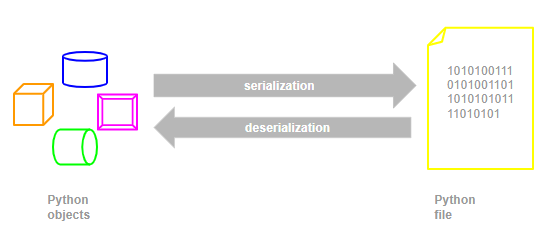

In [ ]:
# Import pickle package
import pickle

### Pickling files

* use `open()` function to open file for writing </br>
    -> 1. parameter: name of file </br>
    -> 2. parameter: `wb` </br>
   `w` for writing to file </br>
   `b` for binary mode   

In [ ]:
filename = 'pickled_data'
outfile = open(filename,'wb')

The file is now opened for writing.
* use `pickle.dump()` to pickle your data </br>
    -> 1. parameter: object you want to pickle </br>
    -> 2. parameter: file to which the object will be saved
    
* use `.close()` to close the file in the end

In [ ]:
pickle.dump(df, outfile)
outfile.close()

In [ ]:
outfile

A file named "**pickled_data**" should now be in your directory.
</br></br>

### Unpickling files
* similar to pickling files
* using `open()` with `'rb'` (binary read mode) instead of `'wb'`

In [ ]:
filename = 'pickled_data'
infile = open(filename,'rb')

Now that the file is opened, let's unpickle it and see the result.

In [ ]:
unpickled_data = pickle.load(infile)
infile.close()

In [ ]:
unpickled_data.head()

---
# Connecting dataframes
The main ways to connect data frames are joining, merging, and concatenating.

Concatenating describes the connecting of data frames. The dimensions along the axis along which the data frames are concatenated should be the same. Herefore you can use pd.concat and give a list of data frames. 

You have to define a axis, if pandas should concatenate the dataframes among themselves - axis = 0 (default in pd. concat) or side by side like in our example. Note that in this example it is important that the indices are identical. There are many possibilities (*) to connect dataframes besides pd.concat. We recommend to look at the page https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html and find the right function for your problem.

(*) Joining is a common method for putting columns with two potentially different indexed data frames into one data frame.
The merging operation takes two data frames and a column to merge “on”. In the output, rows from the left and right dataframes are matched up where there are common values of the merge column.



In [ ]:
df_unit=pd.DataFrame(index=df.index,columns=['unit']) # creates the dataframe 'df_unit' with index range of df and a column named 'unit'
df_unit.head()

In [ ]:
df_unit['unit']='al-burullus-11' # fills the column 'unit'
df_unit.head(3)

In [ ]:
df2=pd.concat([df, df_unit], axis=1)
df2[:3]

In [ ]:
df3=pd.concat([df, df_unit], axis=0,sort=False)
df3

### Exercise
1) Please concatenate the data frames df4-df6 (given in the following) along the horizontal axis.

2) Please concatenate the data frames df4-df6 (given in the following) along the vertical axis.

In [ ]:
df4 = pd.DataFrame({'A': ['A0', 'A1'],
                        'B': ['B0', 'B1']},
                        index=[0, 1])
df5 = pd.DataFrame({'A': ['A2', 'A3'],
                        'B': ['B2', 'B3']},
                         index=[2,3]) 
df6 = pd.DataFrame({'A': ['A4', 'A5'],
                        'B': ['B4', 'B5']},
                        index=[4,5])

In [ ]:
# Please enter here the solution for exercise 1

In [ ]:
# Please enter here the solution for exercise 2

---

## Additional Information

Documentation on all possible Pandas commands can be found at: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 